# 7장. 상관관계 분석
<br/>

|    분석    |     특성    |                           목적                          |
|:----------:|:-----------:|:-------------------------------------------------------:|
| Pearson    | 수치형 변수 | 두 변수간의 선형적 상관 관계 파악                       |
| Spearman   | 순서형 변수 | 두 계량형 변수 또는 순서형 변수   사이의 상관 관계 파악 |
| Canonical  | 변수 집단   | 두 변수 집단간의 선형적 상관 관계   파악 및 계량적으로 표현 |
<표: 상관관계 분석의 종류>

#### 7.1 수치형 변수의 상관관계 분석
1) 개념
<br/>
* 피어슨 상관관계 분석(Peasrson correlation analysis): 수치형 변수로 이루어진 두 변수간의 선형적 상관관계를 계량적으로 파악하기 위한 통계기법 
<br/>
<br/>
* 단순 상관관계 분석(simple correlation analysis): 상관관계 분석의 변수가 2개인 경우
<br/>
* 다중 상관관계 분석(multiple correlation analysis): 상관관계 분석의 변수가 3개 이상인 경우
<br/>
* 편(부분) 상관관계 분석(partial correlation analysis): 다중상관분석에서 두 변수를 제외한 다른 변수들을 고정하고, 두 변수만의 순수한 상관관계의 강도를 나타내는 것
<br/>
<br/>
* 공분산(covariance): 두 변수의 선형적인 연관성의 정도를 의미
\begin{align*}
    s_{xy} = \frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})\cdot(y_{i}-\bar{y})
\end{align*}
각 변수의 편차곱 합계에 대한 평균이라 볼 수 있으며, 공분산이 양수면 양의 선형관계, 음수면 음의 선형관계를 가진다고 볼 수 있다. 하지만 공분산은 상관관계의 방향성만을 알 수 있다는 단점이 있다. 이러한 단점을 보완한 선형관계의 강도를 나타낸 상관계수(Pearson)은 다음과 같이 정의된다.
\begin{align*}
    r = \frac{s_{xy}}{s_{x}s_{y}} =  \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})\cdot(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}\cdot\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}} \in (-1,1)
\end{align*}
상관계수의 부호가 음이냐 양이냐에 따라 방향성이 결정되고, 값의 절댓값이 1에 가까울수록 상관관계가 크고, 0에 가까울수록 상관관계가 떨어진다고 볼 수 있다.
<br/><br/>
* 예시)
<br/>
A쇼핑은 매출액과 높은 연관성을 지닌 고객 데이터가 무엇인지 파악하고자, 일차적으로 방문 빈도와 구매 카테고리 수라는 변수를 선별하였다. 상관관계 분석을 위한 귀무가설은 다음과 같다.
<br/>
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{총 매출액과 방문빈도, 구매 카테고리 수 간의 선형적인 관계가 존재하지 않는다.}\\
    H_{1}(\text{연구가설}) &= \text{총 매출액과 방문빈도, 구매 카테고리 수 간의 선형적인 관계가 존재한다.} 
\end{align}
<br/>

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
file_dir = '/content/drive/MyDrive/pythondata/데이터'
df = pd.read_csv(file_dir + '/Ashopping.csv', encoding = 'CP949')

In [20]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
# combinations을 위해 itertools import
from itertools import *
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

df1 = df[['총_매출액', '방문빈도','구매_카테고리_수']]

# 순서 없는 조합 뽑기
corr_list = list(combinations(df1.columns, 2))
# 상관계수 추출
corr_dic = {x: (stats.pearsonr(df1[x[0]], df1[x[1]])[0], stats.pearsonr(df1[x[0]], df1[x[1]])[1]) for x in corr_list}
itemlist = corr_dic.items()
for item in itemlist:
    print(item)
# for문을 사용하지 않고 상관계수 테이블화
print(df1.astype(float).corr(method = 'pearson'))

(('총_매출액', '방문빈도'), (0.6311706453193392, 3.0519604496879027e-112))
(('총_매출액', '구매_카테고리_수'), (0.3083469132396713, 1.812142275681251e-23))
(('방문빈도', '구매_카테고리_수'), (0.3958607221846449, 7.345432750388509e-39))
              총_매출액      방문빈도  구매_카테고리_수
총_매출액      1.000000  0.631171   0.308347
방문빈도       0.631171  1.000000   0.395861
구매_카테고리_수  0.308347  0.395861   1.000000


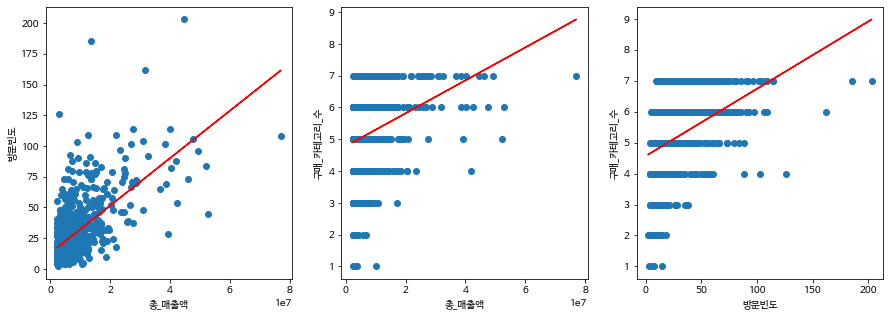

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 1, ncols = len(corr_list), figsize = (15 ,5))
# 각 피쳐별 산포도와 회귀 직선 그리기
for i, x in enumerate(corr_list):
    b0, b1 = np.polyfit(df1[x[0]], df1[x[1]], 1)
    ax[i].plot(df1[x[0]], b0*df1[x[0]]+b1,  color='red')
    ax[i].scatter(df1[x[0]], df1[x[1]])
    ax[i].set_xlabel(x[0])
    ax[i].set_ylabel(x[1])
    

<AxesSubplot:title={'center':'Person Correlation of Features'}>

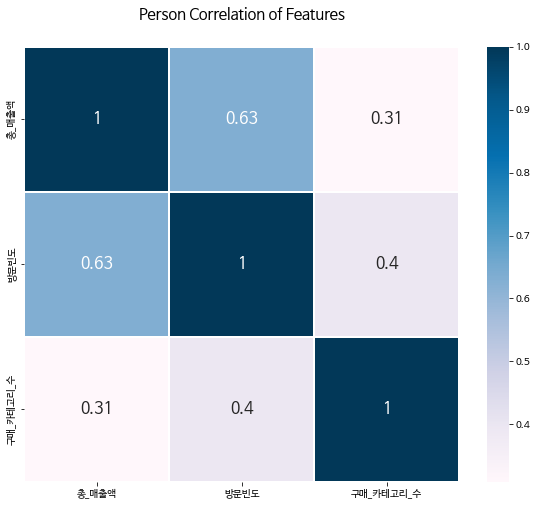

In [67]:
# 상관계수 Heatmap화
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df1.astype(float).corr(method = 'pearson'), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

Heatmap과 같이 상관계수는 다음과 같이 분석된다.

* 3개의 상관계수들의 유의확률은 0.0001 이하로, 귀무가설을 기각시키며 각 변수간에 선형관계가 존재함을 알 수 있다.
* 총 매출액과 방문빈도 사이에 상관계수가 가장 높다.
* 총 매출액과 구매 카테고리 수의 상관관계는 낮아 보인다.

#### 7.2 편(부분) 상관관계 분석
1) 개념

* 일반적인 다중 상관관계 분석에서 상관계수는 특정 두 변수간의 순수한 상관관계를 나타낸다고 볼 수 없다. 왜냐하면 또 다른 제 3의 변수가 두 변수의 연관성 자체에 영향을 미칠 수 있기 때문이다.

* 편(부분) 상관관계 분석: 특정 두 변수의 순수한 상관관계를 확인하기 위해 두 변수에 영향을 미칠 수 있는 제 3의 변수를 통제/효과 제거하여 순수한 상관관계를 파악하는 통계분석기법

* $x,y:$ 순수한 상관관계를 파악하기 위한 특정 변수, $z:$ 제 3의 변수라 두자. 두 변수 $x,y$각각에서 $z$에 의해 선형적으로 설명되는 부분을 제거하고 남은 잔차를 이용하여 상관계수를 계산한다. 이때 잔차 계산은 단순회귀분석을 사용한다. 편의상 다음의 공식을 이용한다.
\begin{align*}
    &r_{xy\cdot z} = \frac{r_{xy} - r_{xz}\cdot r_{yz}}{\sqrt{(1-r_{xz}^{2})(1-r_{yz}^{2})}}
\end{align*}

* 예시)<br/>
앞선 결과에서 A쇼핑의 총 매출액은 방문빈도와 높은 상관관계가 있음을 알고 있다. 하지만 구매 카테고리 수라는 제 3의 변수가 매출액과 방문빈도의 상관관계에 관여가 되어 있을 수 있다고 생각할 수 있다. 따라서 편 상관관계 분석을 통해 매출액과 방문빈도 간의 순수한 상관관계를 파악한다.
<br/>
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{구매카테고리 수가 통제된 상황에서 총 매출액과 방문빈도 간에는 유의한 선형관계를 갖지 않는다.}\\
    H_{1}(\text{연구가설}) &= \text{구매카테고리 수가 통제된 상황에서 총 매출액과 방문빈도 간에는 유의한 선형관계를 갖는다.} 
\end{align}


In [ ]:
# 편 상관계수를 계산하기 위한 라이브러리 불러오기
!pip install pingouin

In [64]:
from pingouin import partial_corr
# covar은 제어하고자 하는 변수
part_corr = partial_corr(data = df1, x= '총_매출액', y = '방문빈도', covar = '구매_카테고리_수')
print("유의확률:", part_corr['p-val'])
print("매출액과 방문빈도 편 상관계수: ", round(part_corr.r,4))
print("매출액과 방문빈도 상관계수: {:.4f}" .format(stats.pearsonr(df1['총_매출액'],df1['방문빈도'])[0]))

유의확률: pearson    6.223289e-92
Name: p-val, dtype: float64
매출액과 방문빈도 편 상관계수:  pearson    0.5828
Name: r, dtype: float64
매출액과 방문빈도 상관계수: 0.6312


유의확률이 0.001 이하이므로 귀무가설이 기각되어 해당 검증은 유의미한 결과를 보인다. 즉, 구매카테고리가 통제된 상황에서 매출엑과 방문빈도간의 상관관계는 유의미하다. 하지만 상관계수가 0.631에서 통제로 인해 0.583으로 감소하여, 고객의 구매 다양성을 나타내는 구매 카테고리 수를 고려하지 않는다면 매출액과 방문빈도의 관계는 생각보다 크지 않다는 것을 알 수 있다. (어느정도 영향을 미침) 

#### 7.3 순서형 변수의 상관관계 분석

(1) 개념

* 순서형 변수의 상관관계 분석은 서열척도로 이루어진 변수들간의 상관관계를 검정하기 위한 분석기법이다.
* 분석은 주로 스피어만(Spearman) 서열 상관관계 분석을 통해 수행한다. 스피어만 상관계수의 변수는 자료 값들의 순위(rank)를 이용하여 상관계수를 계산한다.
\begin{align*}
    \text{Pearson correlation coefficient}&=\frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}\sqrt{\sum_{i=1}^{n}(y_{i} - \bar{y})^{2}}}\\    
    \text{Spearman correlation coefficient}&=\frac{\sum_{i=1}^{n}(R_{i} - \bar{R})(S_{i} - \bar{S})}{\sqrt{\sum_{i=1}^{n}(R_{i} - \bar{R})^{2}}\sqrt{\sum_{i=1}^{n}(S_{i} - \bar{S})^{2}}}\\
    &= 1 - \frac{6\sum_{i=1}^{n}(R_{i} - S_{i})^{2}}{n(n^{2}-1)} \in (-1,1)\\
    where \quad \{R_{i}\}_{i=1}^{n}, \{S_{i}\}_{i=1}^{n}:\quad \text{Rank of $x$, $y$}
\end{align*}
* 예시)<br/>
A쇼핑은 1회 평균매출액이 높은 고객 100명과 방문빈도가 많은 고객 100명을 선별하여 특별한 사은 행사를 진행하고자 한다. 두 가지 변수를 기준으로 순위를 선정하였을 때 선별된 고객들이 동질적이라면 두 가지 기준으로 고객을 선별할 필요가 없다.
<br/>
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{A쇼핑 고객들의 1회 평균 매출액 순위와 방문빈도 순위는 연관성이 없다.}\\
    H_{1}(\text{연구가설}) &= \text{A쇼핑 고객들의 1회 평균 매출액 순위와 방문빈도 순위는 연관성이 있다.} 
\end{align}


In [97]:
df2 = df[['1회_평균매출액','방문빈도']]

spear_stats, spear_p = stats.spearmanr(df2['1회_평균매출액'], df2['방문빈도'])
print("스피어만 상관계수: {:.4f}".format(spear_stats))
print("유의확률: ",spear_p)

스피어만 상관계수: -0.4988
유의확률:  4.929293870381245e-64


Text(0, 0.5, '1회_평균매출액')

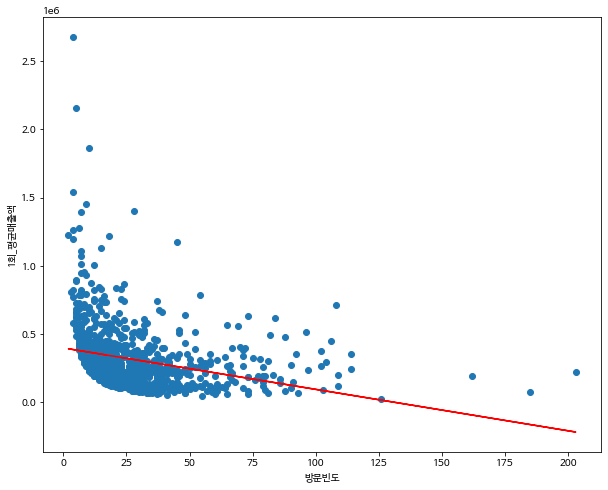

In [101]:
fig1, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (10 ,8))
# 각 피쳐별 산포도와 회귀 직선 그리기

b0, b1 = np.polyfit(df2['방문빈도'], df2['1회_평균매출액'], 1)
ax1.plot(df2['방문빈도'], b0*df2['방문빈도']+b1,  color='red')
ax1.scatter(df2['방문빈도'], df2['1회_평균매출액'])
ax1.set_xlabel('방문빈도')
ax1.set_ylabel('1회_평균매출액')

유의확률이 0.001보다 작게 나왔으므로 귀무가설을 기각한다. 즉, 두 서열변수간의 상관관계는 유의미하지만, 공분산이 음의 방향을 가리키므로 방문빈도가 잦은 고객은 오히려 1회 평균 매출액이 적은 것을 확인할 수 있다. 따라서 서열화된 고객목록은 상당히 상이하므로, 두 가지 기준을 각각 적용해봐야한다.

#### 7.4 정준상관분석

(1) 개념

* 정준상관분석(Canonical Correlation Analysis, CCA): 변수 집단 간의 선형 상관 관계를 탐색하는 분석 방법이다.
* 두 집단 사이의 상관관계를 파악하고, 둘 사이에 상관성르 가장 잘 표현해주는 요인 변수들의 선형 페어(pair)를 찾는 분석방법
* 이러한 관점에서 정관상관분석은 요인분석과 다변량회귀분석의 역할을 결합한 분석방법으로 알려져 있다.
* 일반적으로 정준상관분석에 사용되는 변수는 연속형(continuous)이어야 하지만, 범주형 변수인 경우 더미 변수화(특성을 갖는다, 갖지 않는다를 0과 1로 표현)를 통해 분석에 사용할 수 있다.

* 정준 상관 모형<br/>
$|X| = p,$ $|Y|= q$ $(p\leq q)$인 두 집단이 존재할 때, 선형결합으로 이루어진 
\begin{align*}
    &X = \alpha^{T}x\\
    &Y = \beta^{T}y\\
    \text{where } &\alpha, x \in \mathbb{R}_{p},\quad \beta, y \in \mathbb{R}_{q}
\end{align*}
을 정준변수(canonical variate)라 하고, 두 집단의 상관계수
\begin{align*}
    \rho = Corr(X,Y)
\end{align*}
를 정준상관계수(canonical correlation coefficient)라고 한다. 이때 $\alpha$와 $\beta$는 정준계수(canonical coefficient)라고 한다. 
* 정준 상관 모형은 조합 가능한 모든 선형결합 중 $X$, $Y$의 상관계수를 최대화 시키는 선형 결합을 찾는다. 정준변수간 상관계수가 최대가 되는 정준상관계수를 '제1 정준상관계수'라 하고, 그때의 정준변수들을 '제1 정준계수(first canonical variate pair)'라 한다. 제1 정준변수만으로는 두 집단을 설명하기 충분하지 않을 수 있으므로 제1 정준변수와 독립(linearly independent)적이면서 상관계수를 가장 크게 해주는 다른 선형결합을 제 2 정준변수라 한다.
* 정준변수 쌍을 반복해서 계산할 수 있으나, 일반적으로 제1 정준변수만으로도 두 집단간의 관계를 잘 설명하는 경우가 많으므로 제1 정준상관계수의 결과만으로 해석하는 경우가 많다.
* 정준상관분석의 목적은 정준상관계수와 정준변수를 추정하는 것 외에도 정준적재량(canonical loadings)과 교차적재량(cross loadings)을 통해 두 집단간의 관계에 대한 각 변수의 상대적 영향력을 확인하는 것이다.
* 정준적재량: 정준변수와 정준변수를 구성하는 측정변수들 사이의 상관계수
* 교차적재량: 정준변수와 대립하는 정준변수의 측정변수들 사이의 상관계수

* 예시)<br/>
A 쇼핑은 제품 만족도와 매장 만족도 사이에 연관이 있는지 알아보고 싶다.<br/>
제품 만족도 변수: 가격, 디자인, 품질 만족도 <br/>
매장 만족도 변수: 직원 서비스, 매장 시설, 고객관리 <br/>
<br/>
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{제품 만족도는 매장 만족도와 연관성이 없다.}\\
    H_{1}(\text{연구가설}) &= \text{제품 만족도는 매장 만족도와 연관성이 있다.} 
\end{align}


In [104]:
file_dir = '/content/drive/MyDrive/pythondata/데이터'
cca_df = pd.read_csv(file_dir + '/CCA.csv', encoding = 'CP949')
cca_df.head()

,품질,가격,디자인,직원 서비스,매장 시설,고객관리
0,8,10,71,72,9,27
1,83,21,94,63,7,77
2,81,62,74,96,7,32
3,75,74,98,96,3,55
4,34,76,98,84,6,95


In [172]:
# 사이킷런 교차분석에 있는 CCA를 불러온다.
from sklearn.cross_decomposition import CCA
product_df = cca_df[['가격','디자인','품질']]
store_df = cca_df[['직원 서비스','매장 시설','고객관리']]

#n_components는 각 집단을 몇 개의 요인으로 할당하여 정준상관계수를 계산할 설정하는 기능
# 정준변수를 (제품만족도, 매장만족도)로 묶어 두 집단간의 관계를 볼 것이므로 1로 설정
cca = CCA(n_components=1).fit(product_df, store_df)
product_df_c, store_df_c = cca.transform(product_df, store_df)
product_df_c1 = pd.DataFrame(product_df_c)[0]
store_df_c1 = pd.DataFrame(store_df_c)[0]

print(product_df_c1)
print('\n',store_df_c1)

0    -0.554515
1    -0.123016
2     0.407089
3     1.486187
4     1.839360
5    -0.186380
6    -0.476049
7    -1.104594
8    -0.722315
9     0.024236
10   -0.697448
11    0.549587
12   -0.809846
13    0.367706
Name: 0, dtype: float64

 0    -0.298289
1     0.513384
2     0.950007
3     1.765142
4     1.810625
5    -0.746326
6    -1.676767
7    -1.005781
8    -1.403616
9     1.387662
10   -1.288275
11   -0.312056
12    0.231132
13    0.073157
Name: 0, dtype: float64


In [171]:
cca_corr1, cca_p = stats.pearsonr(product_df_c1, store_df_c1)
print("제1 정준상관계수: {:.4f}".format(cca_corr1))
print("유의확률: {:.4f}".format(cca_p))
np.corrcoef(product_df_c1, store_df_c1).diagonal(offset=1)

제1 정준상관계수: 0.7718
유의확률: 0.0012


array([0.77176879])

Text(0.5, 51.0, '매장 만족도의 교차적재량')

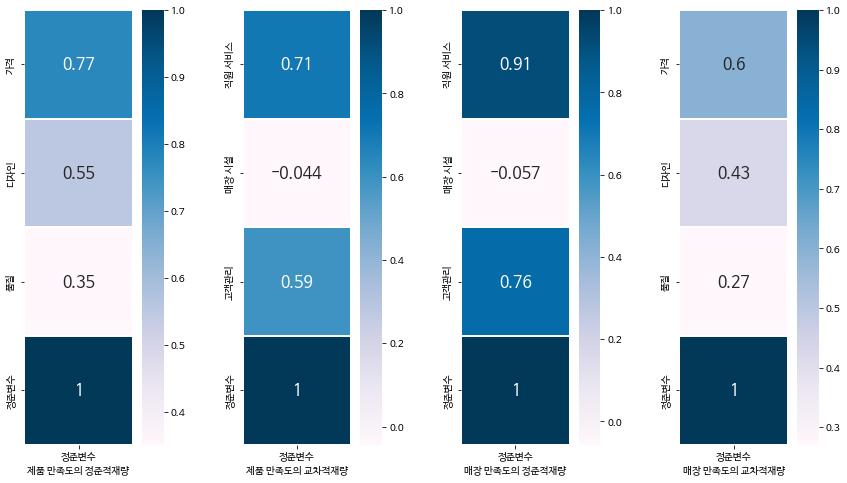

In [168]:
# 각 정준변수의 정준적재량 및 교차적재량 변수 만들기
pd_cl_df = pd.merge(product_df,product_df_c1, left_index=True, right_index=True, how = 'left')
pd_cl_df = pd_cl_df.rename(columns={0:'정준변수'})

pd_cr_df = pd.merge(store_df,product_df_c1, left_index=True, right_index=True, how = 'left')
pd_cr_df = pd_cr_df.rename(columns={0:'정준변수'})

st_cl_df = pd.merge(store_df, store_df_c1, left_index=True, right_index=True, how = 'left')
st_cl_df = st_cl_df.rename(columns={0:'정준변수'})

st_cr_df = pd.merge(product_df,store_df_c1, left_index=True, right_index=True, how = 'left')
st_cr_df = st_cr_df.rename(columns={0:'정준변수'})

# 상관계수 Heatmap화
fig2, ax2 = plt.subplots(nrows = 1, ncols = 4, figsize = (15 ,8))

colormap = plt.cm.PuBu
sns.heatmap(pd_cl_df.astype(float).corr(method = 'pearson')[['정준변수']], linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16}, ax = ax2[0])
ax2[0].set_xlabel("제품 만족도의 정준적재량")

sns.heatmap(pd_cr_df.astype(float).corr(method = 'pearson')[['정준변수']], linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16}, ax = ax2[1])
ax2[1].set_xlabel("제품 만족도의 교차적재량")

colormap = plt.cm.PuBu
sns.heatmap(st_cl_df.astype(float).corr(method = 'pearson')[['정준변수']], linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16}, ax = ax2[2])
ax2[2].set_xlabel("매장 만족도의 정준적재량")

sns.heatmap(st_cr_df.astype(float).corr(method = 'pearson')[['정준변수']], linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16}, ax = ax2[3])
ax2[3].set_xlabel("매장 만족도의 교차적재량")


유의확률이 약 0.0012로 0.01 이하인 유의수준 99% 수준을 의미하며 상관관계가 약 0.77로 제품만족도와 매장만족도의 상관관계가 매우 높다는 것을 알 수 있다. 

정준적재량을 통해 각 정준변수의 구성관계를 보면, 제품 만족도는 가격과 디자인이 가장 중요한 역할을 하고 있으며, 매장 만족도는 직원서비스와 고객관리가 중요한 역할을 하고 있음을 알 수 있다. 

교차적재량을 통해 정준변수 간의 상세 영향요인을 파악할 수 있는데, 제품 만족도는 매장 만족도의 직원 서비스와 고객관리에 영향을 많이 받고, 매장 만족도는 제품 만족도의 가격과 디자인에 영향을 많이 받았다.

따라서 제품 만족도와 매장 만족도를 모두 높히기 위해서는, 제품 만족도를 위해 매장 시설보단 직원 서비스, 고객관리에 집중해야하고, 매장 만족도를 위해 품질보단 가격과 디자인에 집중하는 것이 좋다.